#  World Happiness Score Project

## 1. Exploratory Data Analysis

### 1.1 Load in data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/yibeihu/Desktop/world-happiness-report-2015-2022.csv')

In [3]:
df.head()

,Unnamed: 0,Happiness Rank,Country,Region,Happiness.Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

### 1.2 Basic Info

In [5]:
df.columns

Index(['Happiness Rank', 'Country', 'Region', 'Happiness.Score',
       'Economy (GDP per Capita)', 'Family (Social Support)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Year'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 1229 non-null   int64  
 1   Country                        1229 non-null   object 
 2   Region                         1229 non-null   object 
 3   Happiness.Score                1229 non-null   float64
 4   Economy (GDP per Capita)       1229 non-null   float64
 5   Family (Social Support)        1229 non-null   float64
 6   Health (Life Expectancy)       1229 non-null   float64
 7   Freedom                        1229 non-null   float64
 8   Trust (Government Corruption)  1229 non-null   float64
 9   Generosity                     1229 non-null   float64
 10  Year                           1229 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 105.7+ KB


#### From here we see that our dataset contains 11 columns of data. Accoding to our model design, we're going to use 9 predictors to regress for the response factor(Happiness Score), among the 9 predictors country and Region are categorical data.

In [7]:
df.describe()

,Happiness Rank,Happiness.Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,77.468674,5.429486,0.975343,1.033193,0.608082,0.440960,0.130756,0.201595,2018.447518
std,44.474181,1.115537,0.434249,0.329578,0.241340,0.154412,0.110818,0.115568,2.283610
min,1.000000,2.404000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,39.000000,4.584000,0.668000,0.828000,0.439000,0.345000,0.056000,0.118000,2016.000000
50%,77.000000,5.410000,1.012160,1.069336,0.639333,0.459000,0.096000,0.187000,2018.000000
75%,116.000000,6.227300,1.295843,1.273850,0.790810,0.559000,0.164000,0.258538,2020.000000
max,158.000000,7.842000,2.209000,1.644000,1.141000,0.740000,0.587000,0.838075,2022.000000


In [8]:
df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia', '-',
       'North America and ANZ', 'Middle East and North Africa',
       'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'South Asia'], dtype=object)

In [9]:
df.groupby(['Region']).agg({'Region':'count'})

,Region
Region,
-,46
Australia and New Zealand,12
Central and Eastern Europe,202
Commonwealth of Independent States,24
East Asia,12
Eastern Asia,32
Latin America and Caribbean,166
Middle East and North Africa,34
Middle East and Northern Africa,108


## 2. Data Cleaning and impute missing data

In [10]:
df.isna().any()

Happiness Rank                   False
Country                          False
Region                           False
Happiness.Score                  False
Economy (GDP per Capita)         False
Family (Social Support)          False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Year                             False
dtype: bool

### 2.1 Categorical data

#### We found that the categorical data of "Region" has missing data, and is represented as "-". To impute these region data, I first see if the country apprears more than once, and if so, I fill in the "-' with the right Region value. If not, then I delete the datapoint. 

In [11]:
missing_region = df[df['Region']=='-']

In [12]:
missing_region.shape

(46, 11)

In [13]:
missing= missing_region.groupby(['Country']).agg({'Country':'count'})

In [14]:
missing.columns.values[0] = 'count'

In [15]:
missing.head()

,count
Country,
Azerbaijan*,1
Belarus*,1
Belize,2
Botswana*,1
Chad*,1


In [16]:
all_country = df.groupby(['Country']).agg({'Country':'count'})

In [17]:
all_country.columns.values[0] = 'count'

In [18]:
all_country.head()

,count
Country,
Afghanistan,8
Albania,8
Algeria,8
Angola,4
Argentina,8


In [19]:
missing_all = missing.merge(all_country, on='Country', suffixes=['_mis','_all'])

In [20]:
missing_all.head()

,count_mis,count_all
Country,,
Azerbaijan*,1,1
Belarus*,1,1
Belize,2,3
Botswana*,1,1
Chad*,1,1


#### Check one of the example where only one occurance of the'Country' doesn't have "Region" value:

In [21]:
df[df['Country']=='Hong Kong S.A.R. of China']

,Happiness Rank,Country,Region,Happiness.Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
858,78,Hong Kong S.A.R. of China,East Asia,5.5104,1.376746,1.243584,1.136631,0.459357,0.332485,0.288281,2020
1010,77,Hong Kong S.A.R. of China,East Asia,5.4770,1.525000,0.841000,0.893000,0.408000,0.342000,0.232000,2021
1163,81,Hong Kong S.A.R. of China,-,5.4250,1.957000,0.954000,0.942000,0.400000,0.383000,0.147000,2022


In [22]:
missing_all.shape, missing_all[missing_all['count_mis'] != missing_all['count_all']].shape

((34, 2), (8, 2))

#### Filter out all the occurance of mapable missing values.

In [23]:
fix = missing.merge(df[['Country','Region']], on='Country', how ='left')

In [24]:
fix=fix[fix['Region'] != '-'].drop_duplicates(subset=['Country'])

In [25]:
fix

,Country,count,Region
2,Belize,2,Latin America and Caribbean
12,Gambia,1,Sub-Saharan Africa
16,Hong Kong S.A.R. of China,1,East Asia
27,Namibia,4,Sub-Saharan Africa
37,North Macedonia,2,Central and Eastern Europe
43,Somalia,3,Sub-Saharan Africa
47,South Sudan,3,Sub-Saharan Africa
53,Taiwan Province of China,2,East Asia


Mapping between Country and Region accordingly for missing values.

In [26]:
get_row= lambda x: fix.iloc[x]
diction={get_row(i)["Country"]:get_row(i)["Region"] for i in range(len(fix))}

In [27]:
for country in diction.keys():
    df.loc[df['Country']==country, "Region"] = diction[country]

In [28]:
cond = df['Region']=='-'

In [29]:
df_new =df[~cond]

In [30]:
df_new.groupby(['Region']).agg({'Region':'count'})

,Region
Region,
Australia and New Zealand,12
Central and Eastern Europe,204
Commonwealth of Independent States,24
East Asia,15
Eastern Asia,32
Latin America and Caribbean,168
Middle East and North Africa,34
Middle East and Northern Africa,108
North America,12


#### We see here some of the Region names are duplicated. Therefore, I map the names and regulated them.

In [31]:
map ={'East Asia':'Eastern Asia','North America and ANZ':'North America',\
      'Middle East and North Africa':'Middle East and Northern Africa',\
      'South Asia':'Southern Asia','Southeast Asia':'Southeastern Asia'}

In [32]:
df_new=df_new.replace(map)

In [33]:
df_new['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia',
       'Commonwealth of Independent States'], dtype=object)

#### For the Categorical column (Region), I mapped regions for countries that has region records and discard the other 28 datapoints. Also, I replace the names of the Region, so now they're uniformed.

### 2.2 Numerical data

#### For the numerical data, the missing values are imputed as 0. However, this isn't accurate representation of the situation. I think that because the situation of the countries would be similar for similarly ranked countries, and the dataset is rankly ordered. Therefore, I first substitute all 0s with np.Nan, and then use ffill to impute the missing values. 

#### 1.Substitute all 0 with np.nan

In [34]:
  df_new =df_new.replace(0, np.nan)

In [35]:
df_new.isna().any()

Happiness Rank                   False
Country                          False
Region                           False
Happiness.Score                  False
Economy (GDP per Capita)          True
Family (Social Support)           True
Health (Life Expectancy)          True
Freedom                           True
Trust (Government Corruption)     True
Generosity                        True
Year                             False
dtype: bool

#### 2.forward fill the value, because the condition of the country would be similar along the rank.

In [36]:
df_new=df_new.ffill()

In [37]:
df_new.isna().any()

Happiness Rank                   False
Country                          False
Region                           False
Happiness.Score                  False
Economy (GDP per Capita)         False
Family (Social Support)          False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Year                             False
dtype: bool

#### 3. Scale data. Scale the relevent predictors to a scale of [0-10] , which is same as the happiness score. This would make the predictors more explanabale.

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scale_data =df_new[["Economy (GDP per Capita)",'Family (Social Support)','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]

In [40]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(scale_data)
df_scaled = pd.DataFrame(df_scaled, columns=[
  "Economy_scale",'Family_scale',\
    'Health_scale','Freedom_scale',\
    'Trust_scale','Generosity_scale'])

In [41]:
df_new=df_new.reset_index()

In [42]:
df_scaled=df_scaled.reset_index()

In [43]:
df_new1 =pd.concat([df_new, df_scaled], axis = 1)

In [44]:
df_new1.shape

(1201, 19)

In [45]:
df_new1.head()

,index,Happiness Rank,Country,Region,Happiness.Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,index,Economy_scale,Family_scale,Health_scale,Freedom_scale,Trust_scale,Generosity_scale
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,0,0.647331,0.814319,0.824235,0.898612,0.714725,0.352584
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,1,0.603187,0.847560,0.829880,0.848483,0.239897,0.519457
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,2,0.614041,0.821299,0.765412,0.876558,0.823550,0.405940
3,3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,3,0.676618,0.802617,0.774721,0.904279,0.621322,0.412637
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,4,0.614421,0.797358,0.792705,0.854204,0.560827,0.545543


In [46]:
df_new2 = df_new1.drop(df_new1.columns[[0, 12]],axis = 1)

In [47]:
df_new2.head()

,Happiness Rank,Country,Region,Happiness.Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Economy_scale,Family_scale,Health_scale,Freedom_scale,Trust_scale,Generosity_scale
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,0.647331,0.814319,0.824235,0.898612,0.714725,0.352584
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,0.603187,0.847560,0.829880,0.848483,0.239897,0.519457
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,0.614041,0.821299,0.765412,0.876558,0.823550,0.405940
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,0.676618,0.802617,0.774721,0.904279,0.621322,0.412637
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,0.614421,0.797358,0.792705,0.854204,0.560827,0.545543


In [48]:
df_new2.to_csv('/Users/yibeihu/Desktop/clean_happiness.csv')

In [49]:
df_new2.describe()

,Happiness Rank,Happiness.Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Economy_scale,Family_scale,Health_scale,Freedom_scale,Trust_scale,Generosity_scale
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,77.203164,5.435828,0.974252,1.039712,0.612900,0.442535,0.130629,0.203889,2018.380516,0.449431,0.618986,0.534892,0.594796,0.221437,0.241481
std,44.558000,1.117350,0.428065,0.320709,0.236949,0.151039,0.110227,0.114774,2.255568,0.200621,0.202213,0.208686,0.205745,0.188046,0.137275
min,1.000000,2.404000,0.015300,0.058000,0.005565,0.005890,0.000830,0.001990,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,4.587000,0.668000,0.830484,0.443000,0.350000,0.056000,0.119730,2016.000000,0.305901,0.487064,0.385258,0.468744,0.094120,0.140823
50%,77.000000,5.425000,1.010000,1.072840,0.640830,0.457270,0.095000,0.188000,2018.000000,0.466185,0.639874,0.559491,0.614867,0.160654,0.222477
75%,115.000000,6.253000,1.294000,1.277000,0.791990,0.558733,0.164000,0.261000,2020.000000,0.599288,0.768600,0.692620,0.753079,0.278367,0.309789
max,158.000000,7.842000,2.149000,1.644000,1.141000,0.740000,0.587000,0.838075,2022.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Plot the relationship between happiness score and 6 numerical predictors.

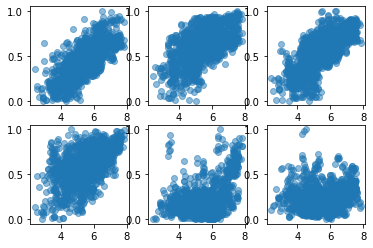

In [50]:
fig, ax = plt.subplots(2,3)
ax[0,0].scatter(df_new2['Happiness.Score'],df_new2['Economy_scale'], alpha = 0.5)
ax[0,1].scatter(df_new2['Happiness.Score'],df_new2['Family_scale'], alpha = 0.5)
ax[0,2].scatter(df_new2['Happiness.Score'],df_new2['Health_scale'], alpha = 0.5)
ax[1,0].scatter(df_new2['Happiness.Score'],df_new2['Freedom_scale'], alpha = 0.5)
ax[1,1].scatter(df_new2['Happiness.Score'],df_new2['Trust_scale'], alpha = 0.5)
ax[1,2].scatter(df_new2['Happiness.Score'],df_new2['Generosity_scale'], alpha = 0.5)

In [51]:
df_new2['Year_num'] = df_new2['Year']-2015

<ipython-input-51-b66dd5464a7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['Year_num'] = df_new2['Year']-2015


In [52]:
df_new2.columns

Index(['Happiness Rank', 'Country', 'Region', 'Happiness.Score',
       'Economy (GDP per Capita)', 'Family (Social Support)',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Year', 'Economy_scale', 'Family_scale', 'Health_scale',
       'Freedom_scale', 'Trust_scale', 'Generosity_scale', 'Year_num'],
      dtype='object')

#### Here we want to turn Region into a categorical variable and turn yearinto a numric variable scaling from 0 to 7

In [53]:
df_total = df_new2[['Happiness.Score','Country','Region','Economy_scale','Family_scale','Health_scale',
       'Freedom_scale', 'Trust_scale', 'Generosity_scale', 'Year_num']]

In [54]:
df_total.head()

,Happiness.Score,Country,Region,Economy_scale,Family_scale,Health_scale,Freedom_scale,Trust_scale,Generosity_scale,Year_num
0,7.587,Switzerland,Western Europe,0.647331,0.814319,0.824235,0.898612,0.714725,0.352584,0
1,7.561,Iceland,Western Europe,0.603187,0.847560,0.829880,0.848483,0.239897,0.519457,0
2,7.527,Denmark,Western Europe,0.614041,0.821299,0.765412,0.876558,0.823550,0.405940,0
3,7.522,Norway,Western Europe,0.676618,0.802617,0.774721,0.904279,0.621322,0.412637,0
4,7.427,Canada,North America,0.614421,0.797358,0.792705,0.854204,0.560827,0.545543,0


In [55]:
regions = pd.get_dummies(df_total['Region'])

In [56]:
df_total = pd.concat([df_total,regions], axis = 1)
df_total.head()

,Happiness.Score,Country,Region,Economy_scale,Family_scale,Health_scale,Freedom_scale,Trust_scale,Generosity_scale,Year_num,...,Central and Eastern Europe,Commonwealth of Independent States,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,7.587,Switzerland,Western Europe,0.647331,0.814319,0.824235,0.898612,0.714725,0.352584,0,...,0,0,0,0,0,0,0,0,0,1
1,7.561,Iceland,Western Europe,0.603187,0.847560,0.829880,0.848483,0.239897,0.519457,0,...,0,0,0,0,0,0,0,0,0,1
2,7.527,Denmark,Western Europe,0.614041,0.821299,0.765412,0.876558,0.823550,0.405940,0,...,0,0,0,0,0,0,0,0,0,1
3,7.522,Norway,Western Europe,0.676618,0.802617,0.774721,0.904279,0.621322,0.412637,0,...,0,0,0,0,0,0,0,0,0,1
4,7.427,Canada,North America,0.614421,0.797358,0.792705,0.854204,0.560827,0.545543,0,...,0,0,0,0,0,1,0,0,0,0


In [57]:
df_total.drop('Region',axis = 1, inplace = True)

In [58]:
df_total.drop('Country',axis = 1, inplace = True)

In [59]:
df_total.head()

,Happiness.Score,Economy_scale,Family_scale,Health_scale,Freedom_scale,Trust_scale,Generosity_scale,Year_num,Australia and New Zealand,Central and Eastern Europe,Commonwealth of Independent States,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,7.587,0.647331,0.814319,0.824235,0.898612,0.714725,0.352584,0,0,0,0,0,0,0,0,0,0,0,1
1,7.561,0.603187,0.847560,0.829880,0.848483,0.239897,0.519457,0,0,0,0,0,0,0,0,0,0,0,1
2,7.527,0.614041,0.821299,0.765412,0.876558,0.823550,0.405940,0,0,0,0,0,0,0,0,0,0,0,1
3,7.522,0.676618,0.802617,0.774721,0.904279,0.621322,0.412637,0,0,0,0,0,0,0,0,0,0,0,1
4,7.427,0.614421,0.797358,0.792705,0.854204,0.560827,0.545543,0,0,0,0,0,0,0,1,0,0,0,0


### 2.3 Split the data into train and test set.

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = df_total.drop('Happiness.Score', axis = 1).values
y = df_total['Happiness.Score'].values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify = df_new2["Region"])

### 2.4  Naive regression model

In [63]:
import statsmodels.api as sm

X_train_1 = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train, X_train_1).fit()

#view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     211.8
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          2.48e-307
Time:                        02:16:01   Log-Likelihood:                -702.79
No. Observations:                 960   AIC:                             1442.
Df Residuals:                     942   BIC:                             1529.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6373      0.112     23.477      0.000       2.417       2.858
x1             1.8179      0.146     12.448      0.000       1.531       2.105
x2             0.8525      0.110      7.719      0.000       0.636       1.069
x3             0.7417      0.159      4.656      0.000       0.429       1.054
x4             1.1963      0.107     11.171      0.000       0.986       1.406
x5             0.4277      0.118      3.634      0.000       0.197       0.659
x6             0.5209      0.149      3.508      0.000       0.229       0.812
x7            -0.0204      0.008     -2.401      0.017      -0.037      -0.004
x8             0.6313      0.160      3.940      0.000       0.317       0.946
x9             0.2499      0.048      5.210      0.000       0.156       0.344
x10            0.1917      0.111      1.720      0.086      -0.027       0.410
x11            0.0414      0.084      0.493      0.622      -0.123       0.206
x12            0.6286      0.050     12.515      0.000       0.530       0.727
x13            0.0646      0.053      1.223      0.222      -0.039       0.168
x14            0.7895      0.126      6.248      0.000       0.542       1.038
x15           -0.2046      0.072     -2.826      0.005      -0.347      -0.063
x16           -0.2588      0.078     -3.324      0.001      -0.412      -0.106
x17           -0.0992      0.060     -1.657      0.098      -0.217       0.018
x18            0.6027      0.062      9.729      0.000       0.481       0.724
==============================================================================
Omnibus:                       19.257   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.610
Skew:                          -0.239   Prob(JB):                     4.53e-06
Kurtosis:                       3.621   Cond. No.                     7.91e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.86e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
from statsmodels.tools.eval_measures import mse

In [65]:
y_hat_train = model.predict(sm.add_constant(X_train))

In [66]:
mse(y_hat_train, y_train)

0.25316233544749395

In [67]:
y_hat_test = model.predict(sm.add_constant(X_test))

In [68]:
mse(y_test, y_hat_test)

0.23077626625721448

#### The mode have roughly 80% for R_square, the variables are all significant under 0.05 level. The MSE for train data is 0.25, and that for test data is 0.233

## 3. Data Exploration

In this section, I use the clean data to answer some questions and do some data analysis to find the trend in the world happiness data:

1.Which countries are doing better or worse comparatively during the pandemic?\
2.Are there multicollinearity among the predictors?\
3.Are world happiness score significantly lower during the Covid? What is the trend in overall happiness, and the other predictors?\
4.Is specific region doing especially good compare to other regions?

### 3.1Which countries are doing better or worse comparatively during the pandemic

In [69]:
df_2019 = df.loc[df.Year==2019]
df_2022 = df.loc[df.Year==2022]

df_joined = df_2019.merge(df_2022,on=["Country","Region"],how="outer",suffixes=["_2019","_2022"])

df_2019.shape,df_2022.shape,df_joined.shape

((156, 11), (146, 11), (181, 20))

In [70]:
df_joined.head()

,Happiness Rank_2019,Country,Region,Happiness.Score_2019,Economy (GDP per Capita)_2019,Family (Social Support)_2019,Health (Life Expectancy)_2019,Freedom_2019,Trust (Government Corruption)_2019,Generosity_2019,Year_2019,Happiness Rank_2022,Happiness.Score_2022,Economy (GDP per Capita)_2022,Family (Social Support)_2022,Health (Life Expectancy)_2022,Freedom_2022,Trust (Government Corruption)_2022,Generosity_2022,Year_2022
0,1.0,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2019.0,1.0,7.821,1.892,1.258,0.775,0.736,0.534,0.109,2022.0
1,2.0,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2019.0,2.0,7.636,1.953,1.243,0.777,0.719,0.532,0.188,2022.0
2,3.0,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.341,0.271,2019.0,8.0,7.365,1.997,1.239,0.786,0.728,0.474,0.217,2022.0
3,4.0,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.118,0.354,2019.0,3.0,7.557,1.936,1.320,0.803,0.718,0.191,0.270,2022.0
4,5.0,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.298,0.322,2019.0,5.0,7.415,1.945,1.206,0.787,0.651,0.419,0.271,2022.0


In [71]:
df_joined["delta_rank"] = df_joined["Happiness Rank_2019"] - df_joined["Happiness Rank_2022"]

rank_improved = df_joined["delta_rank"]<0

In [72]:
sum(rank_improved)

44

In [73]:
df_joined.sort_values(by="delta_rank",ascending=False)[["Country","Happiness Rank_2019","Happiness Rank_2022"]]

,Country,Happiness Rank_2019,Happiness Rank_2022
132,Ukraine,133.0,98.0
115,Armenia,116.0,82.0
124,Bangladesh,125.0,94.0
74,Croatia,75.0,47.0
69,Serbia,70.0,43.0
...,...,...,...
176,Yemen*,NaN,132.0
177,Mauritania*,NaN,133.0
178,Lesotho*,NaN,141.0
179,Botswana*,NaN,142.0


In [74]:
df_joined.sort_values(by="delta_rank",ascending=True)[["Country","Happiness Rank_2019","Happiness Rank_2022"]]

,Country,Happiness Rank_2019,Happiness Rank_2022
90,Lebanon,91.0,145.0
66,Pakistan,67.0,121.0
100,Jordan,101.0,134.0
84,Nigeria,85.0,118.0
78,Turkey,79.0,112.0
...,...,...,...
176,Yemen*,NaN,132.0
177,Mauritania*,NaN,133.0
178,Lesotho*,NaN,141.0
179,Botswana*,NaN,142.0


### 3.2 Are there multicollinearity among the predictors?

In [75]:
df_new2[["Economy_scale",'Family_scale','Health_scale','Freedom_scale','Trust_scale','Generosity_scale']].corr()

,Economy_scale,Family_scale,Health_scale,Freedom_scale,Trust_scale,Generosity_scale
Economy_scale,1.000000,0.480175,0.702291,0.407879,0.344013,-0.105454
Family_scale,0.480175,1.000000,0.613925,0.324432,0.134923,0.002503
Health_scale,0.702291,0.613925,1.000000,0.320615,0.278109,-0.010753
Freedom_scale,0.407879,0.324432,0.320615,1.000000,0.447489,0.178690
Trust_scale,0.344013,0.134923,0.278109,0.447489,1.000000,0.253673
Generosity_scale,-0.105454,0.002503,-0.010753,0.178690,0.253673,1.000000


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

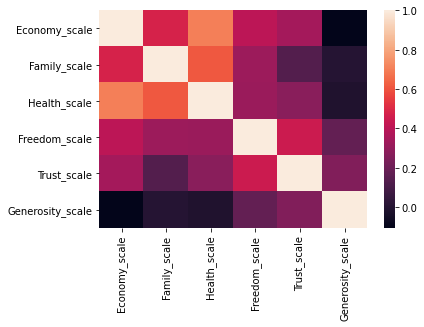

In [77]:
sns.heatmap(df_new2[["Economy_scale",'Family_scale','Health_scale','Freedom_scale','Trust_scale','Generosity_scale']].corr())

In [78]:
nums = df_new2[["Economy_scale",'Family_scale','Health_scale','Freedom_scale','Trust_scale','Generosity_scale']]

#### To make sure, I'm going to do a VIF test.

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [80]:
VIF = pd.Series([vif(nums.values, i) 
               for i in range(nums.shape[1])], 
              index=nums.columns)

In [81]:
VIF

Economy_scale       13.741473
Family_scale        15.321092
Health_scale        18.652649
Freedom_scale       11.756106
Trust_scale          3.301896
Generosity_scale     4.057352
dtype: float64

In [82]:
nums = df_new2[["Economy_scale",'Family_scale','Freedom_scale','Trust_scale','Generosity_scale']]

In [83]:
VIF = pd.Series([vif(nums.values, i) 
               for i in range(nums.shape[1])], 
              index=nums.columns)
VIF

Economy_scale        9.379630
Family_scale        11.249861
Freedom_scale       11.747367
Trust_scale          3.288315
Generosity_scale     4.017133
dtype: float64

In [84]:
nums = df_new2[["Economy_scale",'Family_scale','Trust_scale','Generosity_scale']]
VIF = pd.Series([vif(nums.values, i) 
               for i in range(nums.shape[1])], 
              index=nums.columns)
VIF

Economy_scale       8.492405
Family_scale        9.349901
Trust_scale         3.006608
Generosity_scale    3.591060
dtype: float64

#### The VIF test showed multicollinearity among Economy, family, health and freedom. It might be a factor affecting the regression.

### 3.3 Are world happiness score significantly lower during the Covid? What is the trend in overall happiness, and the other predictors?

In [85]:
df_cov = df_total.copy()

In [86]:
def if_cov(x):
    if x>= 4 and x<= 5:
        return 1
    else:
        return 0
df_cov['cov'] = df_cov['Year_num'].apply(lambda x: if_cov(x))

#### Check the mean score during covid and not during covid.

In [87]:
df_cov.groupby(['cov'])['Happiness.Score'].mean()

cov
0    5.435601
1    5.436491
Name: Happiness.Score, dtype: float64

In [88]:
score_no = df_cov[df_cov['cov'] == 0]['Happiness.Score']
score_cov = df_cov[df_cov['cov'] == 1]['Happiness.Score']

In [89]:
import scipy.stats as stats

In [90]:
stats.ttest_ind(a=score_cov, b=score_no, equal_var=False)

Ttest_indResult(statistic=0.012065472240780367, pvalue=0.9903778952257337)

#### Therefore, we conclude that although it's surprising, the happiness scores during covid is not significantly lower than without.

In [91]:
yearly_happiness = df_cov.groupby(['Year_num'])['Happiness.Score'].mean().reset_index()

In [92]:
yearly_happiness 

,Year_num,Happiness.Score
0,0,5.375734
1,1,5.382185
2,2,5.353253
3,3,5.362366
4,4,5.399981
5,5,5.473240
6,6,5.532839
7,7,5.657089


In [93]:
year_happiness = []
for i in range(8):
    arr = df_cov[df_cov['Year_num'] == i]['Happiness.Score']
    year_happiness.append(arr)

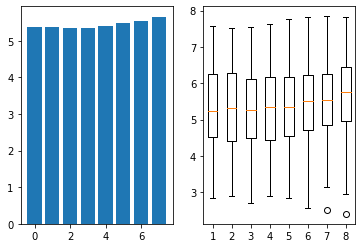

In [94]:
fig, ax = plt.subplots(1,2)
ax[0].bar(yearly_happiness['Year_num'],yearly_happiness['Happiness.Score'])
ax[1].boxplot(year_happiness)
plt.show()

#### However, de do see an increasing trend of mean happiness score across the years.

### 3.4 Is specific region doing especially good compare to other regions?

In [95]:
df_reg = df_new2.copy()

In [96]:
pivot = df_reg.pivot_table(
...     columns='Region', 
...     values='Happiness.Score')

In [97]:
pivot

Region,Australia and New Zealand,Central and Eastern Europe,Commonwealth of Independent States,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Happiness.Score,7.275667,5.566607,5.412671,5.712406,5.993051,5.288533,7.147855,5.362723,4.515184,4.280453,6.822217


In [98]:
region_happiness_mean = df_reg.groupby(['Region'])['Happiness.Score'].mean().reset_index()

In [99]:
reg = set(df_reg['Region'].unique())

In [100]:
region_happiness = []
for i in reg:
    #print(i)
    arr = df_reg[df_reg['Region'] == i]['Happiness.Score']
    #print(arr)
    region_happiness.append(arr)

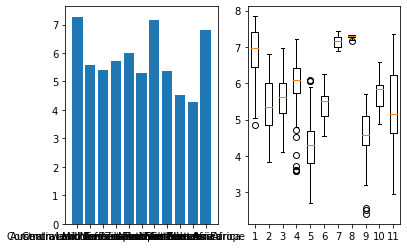

In [101]:
fig, ax = plt.subplots(1,2)
ax[0].bar(region_happiness_mean['Region'],region_happiness_mean['Happiness.Score'])
ax[1].boxplot(region_happiness)
plt.show()

#### It seems like happiness score are very different across region. I further conduct a Tukey test to exam this hypothesis.

In [102]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [103]:
df_reg_happiness = pd.DataFrame({"score":df_reg['Happiness.Score'], 'region':df_reg['Region']})

In [104]:
tukey = pairwise_tukeyhsd(endog=df_reg_happiness['score'],
                          groups=df_reg_happiness['region'],
                          alpha=0.05)

In [105]:
print(tukey)

                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
              group1                             group2               meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------------
         Australia and New Zealand         Central and Eastern Europe  -1.7091  0.001  -2.379 -1.0392   True
         Australia and New Zealand Commonwealth of Independent States   -1.863  0.001 -2.6603 -1.0657   True
         Australia and New Zealand                       Eastern Asia  -1.5633  0.001 -2.2927 -0.8338   True
         Australia and New Zealand        Latin America and Caribbean  -1.2826  0.001 -1.9565 -0.6087   True
         Australia and New Zealand    Middle East and Northern Africa  -1.9871  0.001 -2.6651 -1.3092   True
         Australia and New Zealand                      North America  -0.1278    0.9 -0.9513  0.6957  False
         Australia 

#### Indeed, we saw most of the region's happiness scores are significantly different.

## 4. Regression Analysis

#### In this section I'm going to explore three approaches that would enhance my regression model performance: Ridge regression, Drop one correlated variable and PCA decompositions.

### 4.1 LASSO Regression 

In [106]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [107]:
alphas = [0.005, 0.01,0.02,0.1, 0.2, 0.3, 0.4, 0.5,1, 2,3]
ridge_scores = []
MSE=[]
for alpha in alphas:
  
  # Create a lasso regression model
    ridge = Ridge(alpha=alpha)
  
  # Fit the data
    ridge.fit(X_train, y_train)
  
  # Obtain R-squared
    score = ridge.score(X_train, y_train)
    ridge_scores.append(score)
  # Obtain MSE
    y_hat = ridge.predict(X_train)
    MSE.append(mean_squared_error(y_hat, y_train))
print(ridge_scores)
print(MSE)

[0.7925970778911984, 0.7925970628424206, 0.7925970027471708, 0.7925951013278303, 0.792589266454597, 0.7925797363061542, 0.7925666603064395, 0.7925501798570374, 0.7924211611163302, 0.7919712043667332, 0.7913285774354536]
[0.25316234157631196, 0.2531623599453098, 0.2531624332994072, 0.2531647542299306, 0.2531718764544177, 0.25318350924469285, 0.2531994702093339, 0.2532195867492479, 0.2533770709648633, 0.2539263019167604, 0.2547107119772773]


### 4.2 Drop one variable with highest correlation

In [108]:
X_new = df_total.drop(columns=(['Happiness.Score','Health_scale']), axis = 1).values
y_new = df_total['Happiness.Score'].values

In [109]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_new, y_new, test_size= 0.2, stratify = df_new2["Region"])

In [110]:
X_train_2.shape

(960, 17)

In [111]:
X_test_2.shape

(241, 17)

In [112]:
X_train_3 = sm.add_constant(X_train_2)

#fit linear regression model
model_new = sm.OLS(y_train_2, X_train_3).fit()

#view model summary
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     235.9
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          5.02e-316
Time:                        02:16:03   Log-Likelihood:                -700.55
No. Observations:                 960   AIC:                             1435.
Df Residuals:                     943   BIC:                             1518.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8192      0.099     28.609      0.000       2.626       3.013
x1             2.0172      0.138     14.566      0.000       1.745       2.289
x2             1.0964      0.103     10.662      0.000       0.895       1.298
x3             1.2228      0.108     11.375      0.000       1.012       1.434
x4             0.3625      0.115      3.161      0.002       0.137       0.588
x5             0.5548      0.150      3.708      0.000       0.261       0.848
x6            -0.0241      0.008     -2.885      0.004      -0.041      -0.008
x7             0.7669      0.158      4.856      0.000       0.457       1.077
x8             0.2584      0.047      5.488      0.000       0.166       0.351
x9             0.1959      0.111      1.764      0.078      -0.022       0.414
x10            0.0689      0.081      0.846      0.398      -0.091       0.229
x11            0.6200      0.050     12.495      0.000       0.523       0.717
x12            0.0911      0.052      1.753      0.080      -0.011       0.193
x13            0.8677      0.124      6.989      0.000       0.624       1.111
x14           -0.1544      0.071     -2.163      0.031      -0.294      -0.014
x15           -0.3664      0.078     -4.726      0.000      -0.518      -0.214
x16           -0.2492      0.050     -5.021      0.000      -0.347      -0.152
x17            0.7202      0.056     12.753      0.000       0.609       0.831
==============================================================================
Omnibus:                       11.479   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.887
Skew:                          -0.168   Prob(JB):                     0.000965
Kurtosis:                       3.483   Cond. No.                     6.02e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.75e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [113]:
y_hat_train = model_new.predict(sm.add_constant(X_train_2))

In [114]:
mse(y_hat_train, y_train)

2.2505975726750473

In [115]:
y_hat_test = model_new.predict(sm.add_constant(X_test_2))

In [116]:
mse(y_hat_test, y_test)

2.2322682689677493

#### We saw significant improvement when the highly correlated variable is deleted. Confirmed with our EDA, the multicollinearity did influenced our regression. 

### 4.3 PCA Decomposition

In [117]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

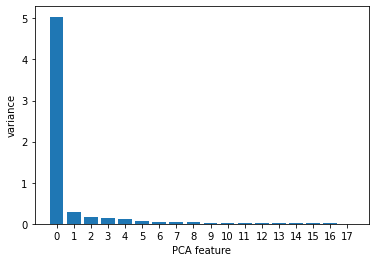

In [118]:
pca = PCA()
pca.fit(X_train)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [119]:
pca = PCA(n_components=2)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

In [120]:
reg = LinearRegression()
reg.fit(pca_train, y_train)
reg.coef_

array([ 0.03209097, -1.55318171])

In [121]:
pca_train_1 = sm.add_constant(pca_train)

#fit linear regression model
model = sm.OLS(y_train, pca_train_1).fit()

#view model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     601.0
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          8.26e-170
Time:                        02:16:03   Log-Likelihood:                -1067.3
No. Observations:                 960   AIC:                             2141.
Df Residuals:                     957   BIC:                             2155.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4257      0.024    228.190      0.000       5.379       5.472
x1             0.0321      0.011      3.029      0.003       0.011       0.053
x2            -1.5532      0.045    -34.539      0.000      -1.641      -1.465
==============================================================================
Omnibus:                       17.652   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.343
Skew:                          -0.338   Prob(JB):                     0.000104
Kurtosis:                       2.980   Cond. No.                         4.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Because there's no clear sign of overfitting, PCA doesn't improve the model performance. The best model is the drop one variable model, which droped " Health_scale" on the basis of the naive model.

## 5. Residual Analysis

<AxesSubplot:xlabel='Economy_scale', ylabel='Happiness.Score'>

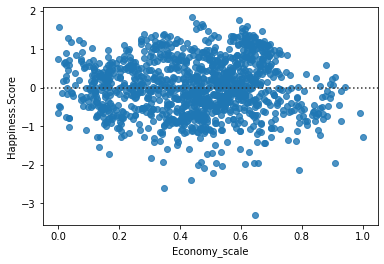

In [122]:
sns.residplot(x='Economy_scale', y='Happiness.Score', data=df_total)


<AxesSubplot:xlabel='Family_scale', ylabel='Happiness.Score'>

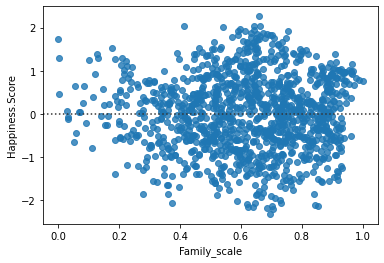

In [123]:
sns.residplot(x='Family_scale', y='Happiness.Score', data=df_total)


<AxesSubplot:xlabel='Freedom_scale', ylabel='Happiness.Score'>

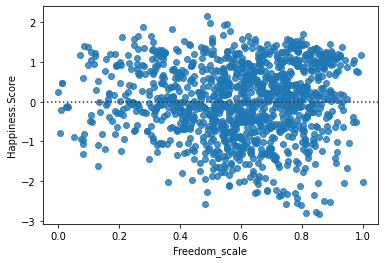

In [124]:
sns.residplot(x='Freedom_scale', y='Happiness.Score', data=df_total)

<AxesSubplot:xlabel='Trust_scale', ylabel='Happiness.Score'>

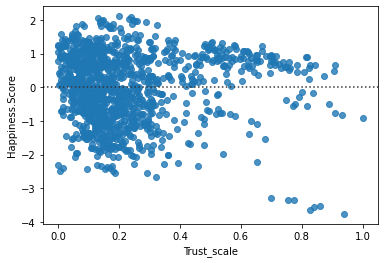

In [125]:
sns.residplot(x='Trust_scale', y='Happiness.Score', data=df_total)

<AxesSubplot:xlabel='Generosity_scale', ylabel='Happiness.Score'>

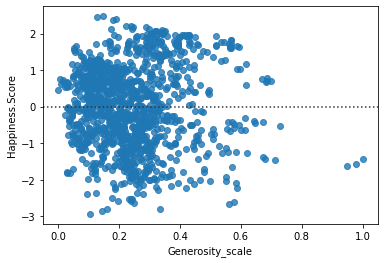

In [126]:
sns.residplot(x='Generosity_scale', y='Happiness.Score', data=df_total)

In [127]:
residual = model_new.predict(sm.add_constant(X_new))- y_new

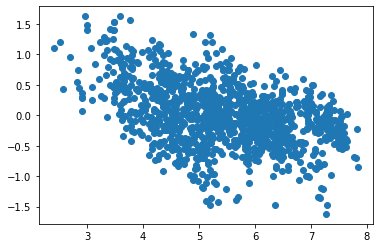

In [128]:
plt.scatter(y_new,residual)